<h1>Credit Card Fraud Detection - Kaggle Competition - Extreme Gradient Boosting </h1> 

<a name='index'></a>
<h2>1. INDEX</h2>
<ul>
    <li><a href='#load'>Load, Clean and Explore Data</a></li>
    <li><a href='#imbalance'>Dealing with Imbalanced Data</a></li>
    <li><a href='#split'>Splitting Data</a></li>
    <li><a href='#xgb'>Extreme Gradient Boost</a></li>
    <li><a href='#opt'>Finetuning using GridSearchCV</a></li>
    <li><a href='#comparison'>Comparison - Tuned vs Untuned Model</a></li>
    <li><a href='#cv'>Cross Validation</a></li>
    <li><a href='#glos'>Glossary</a></li>
</ul>

<H2>2. Introduction</H2>
XGBoost stands for eXtreme Gradient Boosting. 

XGBoost algorithm was developed as a research project at the University of Washington. Tianqi Chen and Carlos Guestrin presented their paper at SIGKDD Conference in 2016 and caught the Machine Learning world by fire. Since its introduction, this algorithm has not only been credited with winning numerous Kaggle competitions but also for being the driving force under the hood for several cutting-edge industry applications.

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

<img src="https://miro.medium.com/max/700/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" alt="image info"/>

The algorithm differentiates itself in the following ways:

<ol>
<li>A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.</li>
<li>Portability: Runs smoothly on Windows, Linux, and OS X.</li>
<li>Cloud Integration: Supports AWS, Azure, and Yarn clusters and works well with Flink, Spark, and other ecosystems.</li>
</ol>
<strong>How to build an intuition for XGBoost?</strong>
<br>
See below for a simple analogy to better understand the evolution of tree-based algorithms.
<br><br>
Imagine that you are a hiring manager interviewing several candidates with excellent qualifications. Each step of the evolution of tree-based algorithms can be viewed as a version of the interview process.
<ol>
<li><strong>Decision Tree</strong>: Every hiring manager has a set of criteria such as education level, number of years of experience, interview performance. A decision tree is analogous to a hiring manager interviewing candidates based on his or her own criteria.</li>
<li><strong>Bagging</strong>: Now imagine instead of a single interviewer, now there is an interview panel where each interviewer has a vote. Bagging or bootstrap aggregating involves combining inputs from all interviewers for the final decision through a democratic voting process.</li>
<li><strong>Random Forest</strong>: It is a bagging-based algorithm with a key difference wherein only a subset of features is selected at random. In other words, every interviewer will only test the interviewee on certain randomly selected qualifications (e.g. a technical interview for testing programming skills and a behavioral interview for evaluating non-technical skills).</li>
<li><strong>Boosting</strong>: This is an alternative approach where each interviewer alters the evaluation criteria based on feedback from the previous interviewer. This ‘boosts’ the efficiency of the interview process by deploying a more dynamic evaluation process.</li>
<li><strong>Gradient Boosting</strong>: A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.</li>
<li><strong>XGBoost</strong>: Think of XGBoost as gradient boosting on ‘steroids’ (well it is called ‘Extreme Gradient Boosting’ for a reason!). It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.</li>
</ol>
Here there is performance comparsion of XGBoost and few other popular algortihms:

<img src="https://miro.medium.com/max/700/1*U72CpSTnJ-XTjCisJqCqLg.jpeg" alt="image info"/>
<br><br> 

Potential further developements:<br>
Machine Learning is a very active research area and already there are several viable alternatives to XGBoost. Microsoft Research recently released LightGBM framework for gradient boosting that shows great potential. CatBoost developed by Yandex Technology has been delivering impressive bench-marking results. It is a matter of time when we have a better model framework that beats XGBoost in terms of prediction performance, flexibility, explanability, and pragmatism. However, until a time when a strong challenger comes along, XGBoost will continue to reign over the Machine Learning world!

<br><br>
The text above is based on post written by Vishal Morde and can be found <a href="https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d">here</a> Have a look has much more details 





<H2>3. LOAD LIBRARIES</H2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split # data split
from termcolor import colored as cl # text customization

# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier # XGBoost algorithm

#Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

# To plot confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Finetuining using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Cross Validation
from sklearn.model_selection import cross_val_score


<h2>4. MISCELLANEOUS</h2>

In [2]:
""" This funciton When called out measures time of execution of cell """
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
   return round(diff_time/60, 0);
""" 
How to use:
In measured cell add \"start \" before measured code and \"end \" at the end of measured cell    
start = time.time()
...
...
end = time.time()
exec_time(start,end)

"""

' \nHow to use:\nIn measured cell add "start " before measured code and "end " at the end of measured cell    \nstart = time.time()\n...\n...\nend = time.time()\nexec_time(start,end)\n\n'

<a href='#index'>Back to Index</a>
<a name='load'></a>
<h2>5. LOAD, CLEAN AND EXPLORE DATA</h2>

In [3]:
# Load Data into pandas dataframe
df = pd.read_csv("creditcard.csv")

#Extend number of columns to display
pd.set_option("max_columns", 20) 

# Check the shape and Basic Statistical Description of each column in dataset
print("Shape: ", df.shape, "\n\nDescribtion: \n", df.describe())

Shape:  (284807, 31) 

Describtion: 
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std 

In [4]:
# Replace empty data with nan:
df = df.replace('', np.nan)

# Check if there are any nan data:
if len([df.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df)))])==0 :
    print("No empty records")
else:
    for i,j in zip(*np.where(pd.isnull(df))):
        df.iloc[i,j]

No empty records


Check how many valid and how many fraudulent transactions are in the dataset.

In [5]:
# Count unique values in column Class
# By default, missing values are ignored
# Therefore, dropna = False makes value_counts to include missing values
cla_count = df.Class.value_counts(dropna = False)
print(cla_count)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
#Count percentage of
cla_ratio_valid = round(cla_count[0]/df.shape[0] * 100, 2)
cla_ratio_fraud = round(cla_count[1]/df.shape[0] * 100, 2)
print("Share of valid transactions in the data set is ",cla_ratio_valid,"%  vs fraudulent transactions",cla_ratio_fraud,"%")

Share of valid transactions in the data set is  99.83 %  vs fraudulent transactions 0.17 %


There are 284315 rows (99.83%) of valid data and 492 rows (0.17%) fraudulent data, so it is very imbalanced data. Usually for imbalanced data, we can try:
<ol>
 <li>Collect more data (which wont work here since the data is given)</li>
 <li>Down-Sampling or Over-Sampling to get balanced samples</li>
 <li>Change the Thresholds to adjust the prediction</li>
 <li>Assign class weights for the low rate class</li>
</ol>

Since this is Fraud detection question, if we let go through a fraud, the credit company will incur a significant loss. If we mistakenly classify a valid transaction as fraudulent, the transaction can be reviewed by human expert or user can be asked for additional verification of the transaction. Therefore, in this specific case, False Positive will cause more significant damage than False Negative.


In [7]:
# Create a list of column headers with the analysied data
features= df.iloc[:,0:29].columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

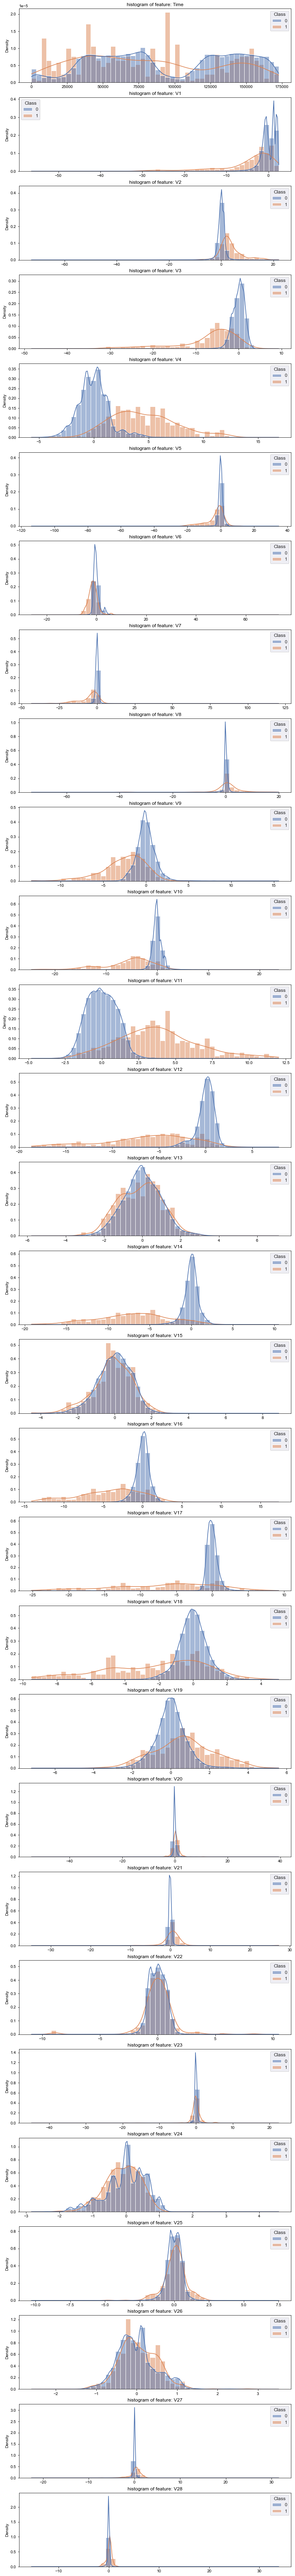

In [8]:
# Plot histograms of features
# Labels: https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot/31632745
# Seaborn cheat_sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
# Seaborn accepted data structers: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
fig, axs = plt.subplots(29,1,figsize=(12,29*4))

for i, c in enumerate(df[features]):
    sns.set_theme()
    p1 = sns.histplot(data = df,ax = axs[i], x=df[c],
                 hue = "Class", alpha = 0.5, stat = "density",
                 bins=50, common_norm=False, kde=True
                )
    p1.set_title('histogram of feature: ' + str(c))
    p1.set(xlabel='')
    
plt.show()

In [9]:
# Split Data into fraudulent and legitimate
df_fraud = df[df.Class == 1]
df_legit = df[df.Class == 0]
# df.head()



outlier_fraction = len(df_fraud)/float(len(df_legit))
print(outlier_fraction)
print('Fraud cases: {}'.format(len(df_fraud)))
print('Valid Transaction: {}'.format(len(df_legit)))

0.0017304750013189597
Fraud cases: 492
Valid Transaction: 284315


In [10]:
print("\n\n Amount details of fraudulent transaction")
df_fraud.Amount.describe()



 Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
print("\n\n Details of valid transaction")
df_legit.Amount.describe()



 Details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From the comparison above, it can be seen that average fraudulent transaction has higher value than valid transaction 122.2 > 88.3
<br>

Lets have a look at correlations between all the factors:


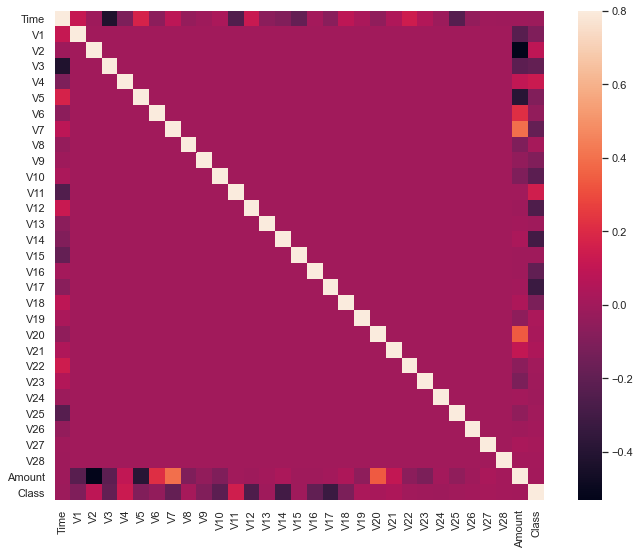

In [12]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

The HeatMap shows that most of the features do not correlate to other features but there are some features that has positive or a negative correlation with each other: 
<ul>
    <li>V2 and V5 highly negativelly correlate with the Amount</li>
    <li>V20 correlate well with amount</li>
</ul>

<a href='#index'>Back to Index</a>
<a name='imbalance'></a>
<h2>6. Dealing with Imbalanced Data</h2>

In [13]:
# All the data except Class is independent data so this is loaded into X
x = df.drop('Class', axis = 1).values
# Since we want to predict class (class = 1 fraud and class = 0 valid transaction)
y = df['Class'].values# All the data except Class is independent data so this is loaded into X

<h3>Under Sampling for Handling Imbalanced Data</h3>
Under sampling works by removing the data set with dominant number of data points

In [14]:
start = time.time()

nm = NearMiss()

# Implementing Undersampling for Handling Imbalanced Data
# x - independent variables but before splitting
# y - dependent variables but after splitting
x_nm, y_nm = nm.fit_resample(x, y)

end = time.time()
time_nm = exec_time(start,end)

Execution Time: 00:00:02


In [15]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_nm)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


<h3>Oversampling for Handling Imbalanced Data</h3>

In [16]:
start = time.time()

os = RandomOverSampler()
x_os, y_os = os.fit_resample(x,y)

end = time.time()

time_os = exec_time(start,end)

Execution Time: 00:00:00


In [17]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_os)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


<h3>Special Teqniques that mix Undersampling and Oversampling for Handling Imbalanced Data</h3>
<br>
SMOTETomek is a hybrid method which uses an under-sampling method (Tomek) with an over sampling method (SMOTE) involves the removal of the Tomek links which are the pairs of examples that are in closest proximity to each other or called the nearest neighbours but belongs to opposite classes.
Hence, the resulting dataset is free from the in between class crowded overlaps so that all nearest neighbours placed at the minimal distance belongs to one class only!


In [18]:
start = time.time()

# This runs for 56 min!!

smk = SMOTETomek(random_state = 42)

# Implementing Oversampling for Handling Imbalanced Data
# x - independent variables but before splitting
# y - dependent variables but after splitting

x_smk, y_smk = smk.fit_resample(x, y)

end = time.time()

time_smk = exec_time(start,end)

Execution Time: 01:09:34


In [19]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_smk)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


<a href='#index'>Back to Index</a>
<a name='split'></a>
<h2>7. Splitting Data</h2>

In [20]:
#Spliting Unbalanced Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# print(cl('x_train samples : ', attrs = ['bold']), x_train[:1])
# print(cl('x_test samples : ', attrs = ['bold']), x_test[0:1])
# print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
# print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

#Spliting data with undersampled valid transactions
x_nm_train, x_nm_test, y_nm_train, y_nm_test = train_test_split(x_nm, y_nm, test_size = 0.2, random_state = 0)

#Spliting data with oversampled fraud transactions
x_os_train, x_os_test, y_os_train, y_os_test = train_test_split(x_os, y_os, test_size = 0.2, random_state = 0)

#Spliting data with imbalanced dealt with by applying SMOTETomek algorithm
x_smk_train, x_smk_test, y_smk_train, y_smk_test = train_test_split(x_smk, y_smk, test_size = 0.2, random_state = 0)

<a href='#index'>Back to Index</a>
<a name='xgb'></a>
<h2>8. Extreme Gradient Boost</h2>
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [21]:
start = time.time()

#Trained on Imbalanced Data
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_yhat = xgb.predict(x_test)

end = time.time()
time_xgb = exec_time(start,end)

Execution Time: 00:00:34


In [22]:
# Metrics for Imbalanced data
xgb_acc = round(accuracy_score(y_test, xgb_yhat) *100,1)
xgb_pre = round(precision_score(y_test, xgb_yhat) *100,1)
xgb_rec = round(recall_score(y_test, xgb_yhat) *100,1)
xgb_f1 = round(f1_score(y_test, xgb_yhat) *100,1)
xgb_mcc = round(matthews_corrcoef(y_test, xgb_yhat),2)
print(cl('Accuracy score of the XGBoost model is {}%'.format(xgb_acc), attrs = ['bold']))
print(cl('Precision score of the XGBoost model is {}%'.format(xgb_pre), attrs = ['bold']))
print(cl('Recall score of the XGBoost model is {}%'.format(xgb_rec), attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}%'.format(xgb_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the XGBoost model is {}'.format(xgb_mcc), attrs = ['bold']))

Accuracy score of the XGBoost model is 99.9%
Precision score of the XGBoost model is 88.9%
Recall score of the XGBoost model is 79.2%
F1 score of the XGBoost model is 83.8%
Matthews Correlation Coefficient of the XGBoost model is 0.84


In [23]:
start = time.time()

#Trained on Data with undersampled valid data
xgb_nm = XGBClassifier()
xgb_nm.fit(x_nm_train, y_nm_train)
xgb_nm_yhat = xgb_nm.predict(x_test)

end = time.time()
time_xgb_nm = exec_time(start,end)

Execution Time: 00:00:00


In [24]:
# Metrics for Data with undersampled valid data
xgb_nm_acc = round(accuracy_score(y_test, xgb_nm_yhat) *100,1)
xgb_nm_pre = round(precision_score(y_test, xgb_nm_yhat) *100,1)
xgb_nm_rec = round(recall_score(y_test, xgb_nm_yhat) *100,1)
xgb_nm_f1 = round(f1_score(y_test, xgb_nm_yhat) *100,1)
xgb_nm_mcc = round(matthews_corrcoef(y_test, xgb_nm_yhat),2)
print(cl('Accuracy score of the XGBoost model is {}%'.format(xgb_nm_acc), attrs = ['bold']))
print(cl('Precision score of the XGBoost model is {}%'.format(xgb_nm_pre), attrs = ['bold']))
print(cl('Recall score of the XGBoost model is {}%'.format(xgb_nm_rec), attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}%'.format(xgb_nm_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the XGBoost model is {}'.format(xgb_nm_mcc), attrs = ['bold']))

Accuracy score of the XGBoost model is 56.3%
Precision score of the XGBoost model is 0.4%
Recall score of the XGBoost model is 99.0%
F1 score of the XGBoost model is 0.8%
Matthews Correlation Coefficient of the XGBoost model is 0.05


In [25]:
start = time.time()

#Trained on Data with oversampled fraud data
xgb_os = XGBClassifier()
xgb_os.fit(x_os_train, y_os_train)
xgb_os_yhat = xgb_os.predict(x_test)

end = time.time()
time_xgb_os = exec_time(start,end)

Execution Time: 00:00:55


In [26]:
# Metrics for Data with oversampled fraud data
xgb_os_acc = round(accuracy_score(y_test, xgb_os_yhat) *100,1)
xgb_os_pre = round(precision_score(y_test, xgb_os_yhat) *100,1)
xgb_os_rec = round(recall_score(y_test, xgb_os_yhat) *100,1)
xgb_os_f1 = round(f1_score(y_test, xgb_os_yhat) *100,1)
xgb_os_mcc = round(matthews_corrcoef(y_test, xgb_os_yhat),2)
print(cl('Accuracy score of the XGBoost model is {}%'.format(xgb_os_acc), attrs = ['bold']))
print(cl('Precision score of the XGBoost model is {}%'.format(xgb_os_pre), attrs = ['bold']))
print(cl('Recall score of the XGBoost model is {}%'.format(xgb_os_rec), attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}%'.format(xgb_os_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the XGBoost model is {}'.format(xgb_os_mcc), attrs = ['bold']))

Accuracy score of the XGBoost model is 99.3%
Precision score of the XGBoost model is 21.4%
Recall score of the XGBoost model is 100.0%
F1 score of the XGBoost model is 35.2%
Matthews Correlation Coefficient of the XGBoost model is 0.46


In [27]:
start = time.time()

#Spliting data with imbalanced data dealt with by applying SMOTETomek algorithm
xgb_smk = XGBClassifier()
xgb_smk.fit(x_smk_train, y_smk_train)
xgb_smk_yhat = xgb_smk.predict(x_test)

end = time.time()
time_xgb_smk = exec_time(start,end)

Execution Time: 00:01:16


In [28]:
xgb_smk_acc = round(accuracy_score(y_test, xgb_smk_yhat) *100,1)
xgb_smk_pre = round(precision_score(y_test, xgb_smk_yhat) *100,1)
xgb_smk_rec = round(recall_score(y_test, xgb_smk_yhat) *100,1)
xgb_smk_f1 = round(f1_score(y_test, xgb_smk_yhat) *100,1)
xgb_smk_mcc = round(matthews_corrcoef(y_test, xgb_smk_yhat),2)
print(cl('Accuracy score of the XGBoost (SMOTETomek) model is {}%'.format(xgb_smk_acc), attrs = ['bold']))
print(cl('Precision score of the XGBoost (SMOTETomek) model is {}%'.format(xgb_smk_pre), attrs = ['bold']))
print(cl('Recall score of the XGBoost (SMOTETomek) model is {}%'.format(xgb_smk_rec), attrs = ['bold']))
print(cl('f1 score of the XGBoost (SMOTETomek) model is {}%'.format(xgb_smk_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the XGBoost model is {}'.format(xgb_smk_mcc), attrs = ['bold']))

Accuracy score of the XGBoost (SMOTETomek) model is 99.4%
Precision score of the XGBoost (SMOTETomek) model is 22.9%
Recall score of the XGBoost (SMOTETomek) model is 93.1%
f1 score of the XGBoost (SMOTETomek) model is 36.8%
Matthews Correlation Coefficient of the XGBoost model is 0.46


<h3>Reciver Operating Characteristic (ROC) And Area Under the Curve of ROC</h3>

In [29]:
# predict probabilities
pred_prob = xgb.predict_proba(x_test)
pred_prob_nm = xgb_nm.predict_proba(x_test)
pred_prob_os = xgb_os.predict_proba(x_test)
pred_prob_smk = xgb_smk.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
fpr_nm, tpr_nm, thresh_nm = roc_curve(y_test, pred_prob_nm[:,1], pos_label=1)
fpr_os, tpr_os, thresh_os = roc_curve(y_test, pred_prob_os[:,1], pos_label=1)
fpr_smk, tpr_smk, thresh_smk = roc_curve(y_test, pred_prob_smk[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = round(roc_auc_score(y_test, pred_prob[:,1]),2)
auc_score_nm = round(roc_auc_score(y_test, pred_prob_nm[:,1]),2)
auc_score_os = round(roc_auc_score(y_test, pred_prob_os[:,1]),2)
auc_score_smk = round(roc_auc_score(y_test, pred_prob_smk[:,1]),2)

In [30]:
print(cl('AUC score for the XGBoost model (Unbalanced Data) is {}'.format(auc_score), attrs = ['bold']))
print(cl('AUC score for the XGBoost model (Under sampled Valid) is {}'.format(auc_score_nm), attrs = ['bold']))
print(cl('AUC score for the XGBoost model (Over sampled Fraud) is {}'.format(auc_score_os), attrs = ['bold']))
print(cl('AUC score of the XGBoost (SMOTETomek) model is {}'.format(auc_score_smk), attrs = ['bold']))

AUC score for the XGBoost model (Unbalanced Data) is 0.98
AUC score for the XGBoost model (Under sampled Valid) is 0.97
AUC score for the XGBoost model (Over sampled Fraud) is 1.0
AUC score of the XGBoost (SMOTETomek) model is 1.0


<h3>Confusion Matrices and ROC plots</h3>

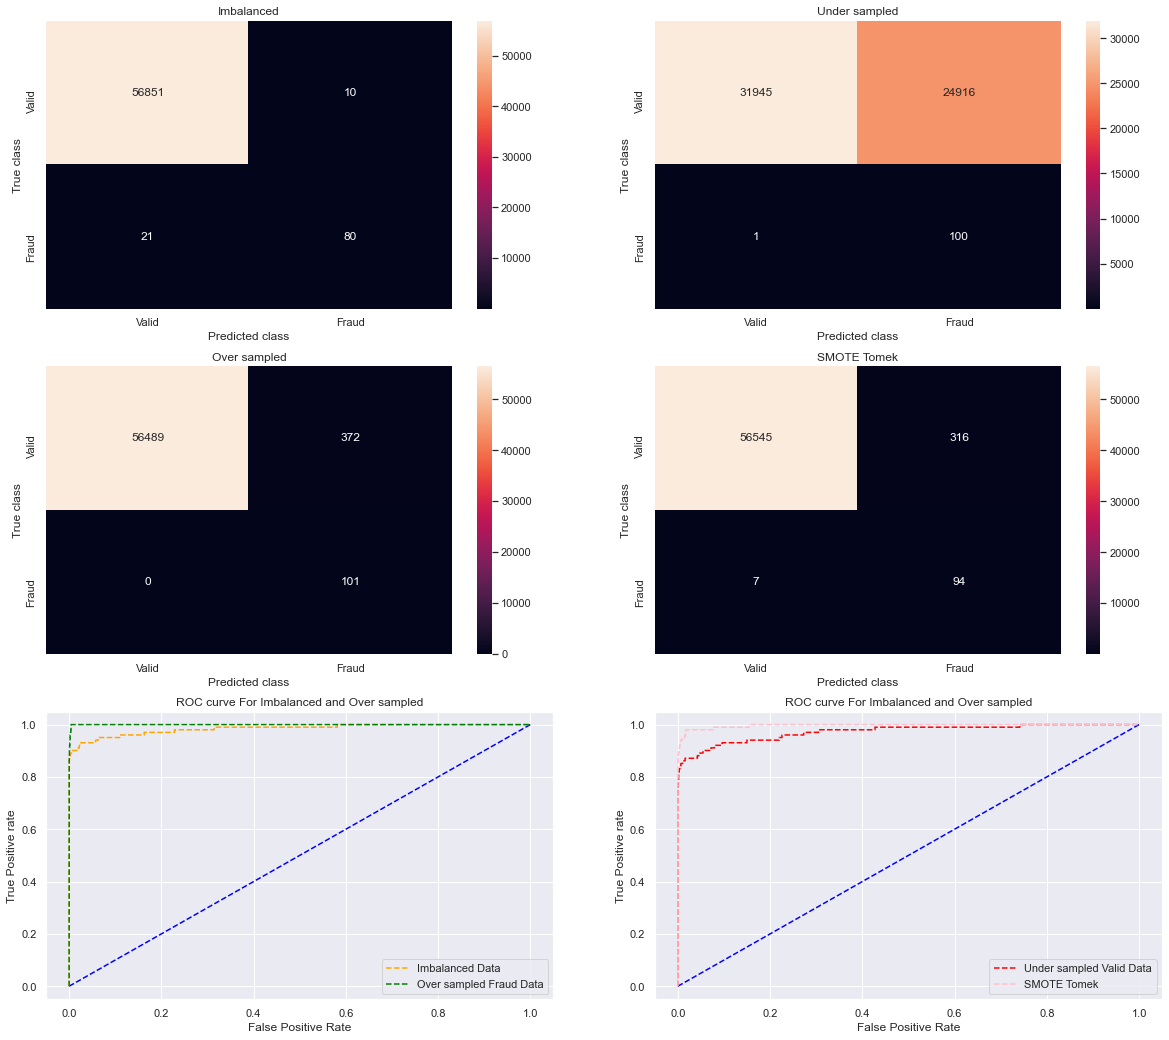

In [31]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,18))
LABELS = ['Valid', 'Fraud']

conf_matrix1 = confusion_matrix(y_test, xgb_yhat)
sns.heatmap(conf_matrix1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax1)
ax1.set_title("Imbalanced")
ax1.set_ylabel("True class")
ax1.set_xlabel("Predicted class")

conf_matrix2 = confusion_matrix(y_test, xgb_nm_yhat)
sns.heatmap(conf_matrix2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax2)
ax2.set_title("Under sampled")
ax2.set_ylabel("True class")
ax2.set_xlabel("Predicted class")

conf_matrix3 = confusion_matrix(y_test, xgb_os_yhat)
sns.heatmap(conf_matrix3, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax3)
ax3.set_title("Over sampled")
ax3.set_ylabel("True class")
ax3.set_xlabel("Predicted class")

conf_matrix4 = confusion_matrix(y_test, xgb_smk_yhat)
sns.heatmap(conf_matrix4, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax4)
ax4.set_title("SMOTE Tomek")
ax4.set_ylabel("True class")
ax4.set_xlabel("Predicted class")

#plot curve for tpr = fpr
ax5.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax5.plot(fpr, tpr, linestyle='--',color='orange', label='Imbalanced Data')
ax5.plot(fpr_os, tpr_os, linestyle='--',color='green', label='Over sampled Fraud Data')
ax5.set_title("ROC curve For Imbalanced and Over sampled")
ax5.set_ylabel("True Positive rate")
ax5.set_xlabel("False Positive Rate")
ax5.legend(loc='best')
# plt.savefig('ROC',dpi=300)


#plot curve for tpr = fpr
ax6.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax6.plot(fpr_nm, tpr_nm, linestyle='--',color='red', label='Under sampled Valid Data')
ax6.plot(fpr_smk, tpr_smk, linestyle='--',color='pink', label='SMOTE Tomek')
ax6.set_title("ROC curve For Imbalanced and Over sampled")
ax6.set_ylabel("True Positive rate")
ax6.set_xlabel("False Positive Rate")
ax6.legend(loc='best')

In [32]:
# Create dataframe with metrics
df_metrics = pd.DataFrame(columns=['Data Type', 'Accuracy [%]', 'Precision [%]','Recall [%]','F1 Score [%]', 'MCC', 'AUC', 'Compute Time [min]'])


# Add Imbalnaced Data Metrics
df_metrics = df_metrics.append({'Data Type': 'Imbalanced Data', 'Accuracy [%]' : xgb_acc,
                                'Precision [%]' : xgb_pre, 'Recall [%]' : xgb_rec, 'F1 Score [%]' : xgb_f1,
                                'MCC' : xgb_mcc, 'AUC' : auc_score,
                                'Compute Time [min]' : time_xgb}, ignore_index = True)

# Add Under Sampled Data Metrics
df_metrics = df_metrics.append({'Data Type': 'Under sampled Valid', 'Accuracy [%]' : xgb_nm_acc,
                                'Precision [%]' : xgb_nm_pre, 'Recall [%]' : xgb_nm_rec, 'F1 Score [%]' : xgb_nm_f1,
                                'MCC' : xgb_nm_mcc, 'AUC' : auc_score_nm,                             
                                'Compute Time [min]' : time_xgb_nm + time_nm,}, ignore_index = True)

# Add Over Sampled Data Metrics
df_metrics = df_metrics.append({'Data Type': 'Over sampled Valid', 'Accuracy [%]' : xgb_os_acc,
                                'Precision [%]' : xgb_os_pre, 'Recall [%]' : xgb_os_rec, 'F1 Score [%]' : xgb_os_f1,
                                'MCC' : xgb_os_mcc, 'AUC' : auc_score_os,   
                                'Compute Time [min]' : time_xgb_os + time_os}, ignore_index = True)

# Add SMOTETomek Data Metrics
df_metrics = df_metrics.append({'Data Type': 'SMOTETomek', 'Accuracy [%]' : xgb_smk_acc,
                                'Precision [%]' : xgb_smk_pre, 'Recall [%]' : xgb_smk_rec, 'F1 Score [%]' : xgb_smk_f1,
                                'MCC' : xgb_smk_mcc, 'AUC' : auc_score_smk,
                                'Compute Time [min]' : time_xgb_smk + time_smk}, ignore_index = True)

df_metrics


,Data Type,Accuracy [%],Precision [%],Recall [%],F1 Score [%],MCC,AUC,Compute Time [min]
0,Imbalanced Data,99.9,88.9,79.2,83.8,0.84,0.98,1.0
1,Under sampled Valid,56.3,0.4,99.0,0.8,0.05,0.97,0.0
2,Over sampled Valid,99.3,21.4,100.0,35.2,0.46,1.00,1.0
3,SMOTETomek,99.4,22.9,93.1,36.8,0.46,1.00,71.0


<h3> Initial conclusion from data augmentation </h3>

Above, three methods of data augmentation have been used and compared to the original imbalanced data. These methods of augmentation are:
<ol>
    <li>Under sampling of valid transactions (majority of transactions)</li>
    <li>Over sampling of fraud transactions (only about 0.17% of overall number of transactions)</li>
    <li>Mix of under and over sampling using SMOTETomek which is a hybrid method that uses an under sampling method (Tomek) with over sampling method (SMOTE) involves the removal of the Tomek links which are the pairs of examples that are in closest proximity to each other or called the nearest neighbours but belongs to opposite classes. </li>
</ol>

The objective of this exercise is to detect fraud, hence main objective it to find as many true positives (fraudulent transactions that has been recognised as fraudulent). 
<br>
Model trained on imbalanced data where Precision rate is 88% which translates to 10 out of 56861 valid transactions that has been classified as fraudulent. However, Recall rate is 79.2% which translates to only 80 fraudulent transactions detected out of 101. 
<br>
Model trained on data set with under sampled valid transactions is successful at detecting fraudulent transactions. Recall rate is 99% or only 1 fraudulent transaction out of 101 fraudulent transactions presented in the training dataset are falsely identified as valid transactions. However, this success comes at a cost of low Precision rate 0.4%, this means that 24916 valid transactions have been mistakenly classified as fraudulent. This is not optimal because this would mean that 24916 transactions would require an additional confirmation steps or human employee intervention. This would be unacceptable for card issuer as this would require enormous cost to verify all these transactions. Also, customers would most likely terminate their cards as the hassle of validating every transaction would be too big to bear. And all this to catch only 0.17% of transactions.
<br>
The best model is trained on test data with oversampled fraudulent transactions. This model does not miss any fraudulent transaction (false negatives), this translates to perfect Recall rate = 100%. Simultaneously only 372 transactions are mistakenly classified as fraudulent out of 56861 total valid transactions, this translates to Precision score of 21.4%. This is reasonable achievement.
<br>
Model trained on data set augmented based on SMOTETomek is worse than model trained on datasets with oversampled data and under sampled data i.e., Recall rate is 93.1% which means 7 fraudulent transaction is classified as valid and Precision rate is 22.9% which means 316 transactions are mistakenly classified as fraudulent out of 56861. This is second best result in terms of precision, after Model trained on dataset with oversampled fraudulent transactions.
<br><br>
Based on the above, for further proceedings in this document, we will choose oversampled data set, as it is perfect at detecting fraudulent transactions with reasonable number of transactions erroneously classified as fraudulent. 


<a href='#index'>Back to Index</a>
<a name='opt'></a>
<h2>9. Finetuning Extreme Gradient Boosting model for Recall Rate using GridSearchCV</h2>

<h3>This is XGboost model fine tuning for Recall using GridSearchCV, trained on unbalanced data set</h3>

In [33]:
start = time.time()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.1, 0.01, 0.05], #so called `eta` value
              'max_depth': range (2, 10, 1),
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': range(60, 220, 40), #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [42]
              }

xgb_gs_cv=GridSearchCV(estimator = XGBClassifier(),
                       param_grid = parameters,
                       scoring = 'recall',
                       cv=5, n_jobs = -1,
                       refit = True)
xgb_gs_cv.fit(x_train,y_train)

end  = time.time()
time_cv = exec_time(start,end)

Execution Time: 00:49:06


In [34]:
xgb_opt_recall = xgb_gs_cv.best_score_
xgb_opt_recall_param = xgb_gs_cv.best_params_ 

In [35]:
print(f"Recall:",xgb_opt_recall," Parameters:", xgb_opt_recall_param)

Recall: 0.787698799091204  Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 180, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'silent': 1, 'subsample': 0.8}


<h3>This is XGBoost model fine tuning for Recall using GridSearchCV, trained on data set with oversampled fraudulent transactions. </h3>

In [36]:
start = time.time()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.1, 0.01, 0.05], #so called `eta` value
              'max_depth': range (2, 10, 1),
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': range(60, 220, 40), #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [42]
              }

xgb_gs_cv_os = GridSearchCV(estimator = XGBClassifier(),
                            param_grid = parameters,
                            scoring = 'recall',
                            cv=5, n_jobs = -1,
                            refit = True
                            )

xgb_gs_cv_os.fit(x_os_train, y_os_train)

end  = time.time()
time_cv_os = exec_time(start,end)

Execution Time: 02:22:07


In [37]:
xgb_opt_recall_os = xgb_gs_cv_os.best_score_
xgb_opt_recall_param_os = xgb_gs_cv_os.best_params_ 

In [38]:
print(f"Recall:",xgb_opt_recall_os," Parameters:", xgb_opt_recall_param_os)

Recall: 1.0  Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 140, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'silent': 1, 'subsample': 0.8}


<h3>This is XGBoost model fine tuned for Recall, trained on unbalanced data set</h3>

In [39]:
# This takes about 8 min to run
start = time.time()

xgb_param = xgb_opt_recall_param.copy()
# lr_param = {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

xgb_opt = XGBClassifier(nthread = xgb_param['nthread'],
                        objective = xgb_param['objective'],
                        learning_rate = xgb_param['learning_rate'],
                        max_depth = xgb_param['max_depth'],
                        min_child_weight = xgb_param['min_child_weight'],
                        silent = xgb_param['silent'],
                        subsample = xgb_param['subsample'],
                        colsample_bytree = xgb_param['colsample_bytree'],
                        n_estimators = xgb_param['n_estimators'],
                        missing = xgb_param['missing'],
                        seed = xgb_param['seed']
              )

xgb_opt.fit(x_train, y_train)
xgb_opt_yhat = xgb_opt.predict(x_test)

end  = time.time()
time_xgb_opt = exec_time(start,end)

Execution Time: 00:00:16


In [40]:
# Metrics for Imbalanced data
xgb_opt_acc = round(accuracy_score(y_test, xgb_opt_yhat) *100,1)
xgb_opt_pre = round(precision_score(y_test, xgb_opt_yhat) *100,1)
xgb_opt_rec = round(recall_score(y_test, xgb_opt_yhat) *100,1)
xgb_opt_f1 = round(f1_score(y_test, xgb_opt_yhat) *100,1)
xgb_opt_mcc = round(matthews_corrcoef(y_test, xgb_opt_yhat),2)
print(cl('Metrics for fine tuned algorithm on dataset with imbalanced dataset:', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}%'.format(xgb_opt_acc), attrs = ['bold']))
print(cl('Precision score of the XGBoost model is {}%'.format(xgb_opt_pre), attrs = ['bold']))
print(cl('Recall score of the XGBoost model is {}%'.format(xgb_opt_rec), attrs = ['bold']))
print(cl('f1 score of the XGBoost model is {}%'.format(xgb_opt_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the XGBoost model is {}'.format(xgb_opt_mcc), attrs = ['bold']))

Metrics for fine tuned algorithm on dataset with imbalanced dataset:
Accuracy score of the XGBoost model is 100.0%
Precision score of the XGBoost model is 91.2%
Recall score of the XGBoost model is 82.2%
f1 score of the XGBoost model is 86.5%
Matthews Correlation Coefficient of the XGBoost model is 0.87


<h3>This is XGBoost model fine tuned for Recall, trained on data set with oversampled fraudulent transactions.</h3>

In [41]:
# This takes about 4 min to run
start = time.time()

xgb_param = xgb_opt_recall_param_os.copy()
# lr_param = {'C': 0.1, 'penalty': 'l2'}

xgb_opt_os = XGBClassifier(nthread = xgb_param['nthread'],
                           objective = xgb_param['objective'],
                           learning_rate = xgb_param['learning_rate'],
                           max_depth = xgb_param['max_depth'],
                           min_child_weight = xgb_param['min_child_weight'],
                           silent = xgb_param['silent'],
                           subsample = xgb_param['subsample'],
                           colsample_bytree = xgb_param['colsample_bytree'],
                           n_estimators = xgb_param['n_estimators'],
                           missing = xgb_param['missing'],
                           seed = xgb_param['seed']
                           )
xgb_opt_os.fit(x_os_train, y_os_train)
xgb_opt_os_yhat = xgb_opt_os.predict(x_test)

end  = time.time()
time_xgb_opt_os = exec_time(start,end)

Execution Time: 00:00:23


In [42]:
# Metrics for Data with oversampled fraud data
xgb_opt_os_acc = round(accuracy_score(y_test, xgb_opt_os_yhat) *100,1)
xgb_opt_os_pre = round(precision_score(y_test, xgb_opt_os_yhat) *100,1)
xgb_opt_os_rec = round(recall_score(y_test, xgb_opt_os_yhat) *100,1)
xgb_opt_os_f1 = round(f1_score(y_test, xgb_opt_os_yhat) *100,1)
xgb_opt_os_mcc = round(matthews_corrcoef(y_test, xgb_opt_os_yhat),2)
print(cl('Metrics for fine tuned algorithm on dataset with oversampled fraudulent transactions:', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}%'.format(xgb_opt_os_acc), attrs = ['bold']))
print(cl('Precision score of the XGBoost model is {}%'.format(xgb_opt_os_pre), attrs = ['bold']))
print(cl('Recall score of the XGBoost model is {}%'.format(xgb_opt_os_rec), attrs = ['bold']))
print(cl('f1 score of the XGBoost model is {}%'.format(xgb_opt_os_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the XGBoost model is {}'.format(xgb_opt_os_mcc), attrs = ['bold']))

Metrics for fine tuned algorithm on dataset with oversampled fraudulent transactions:
Accuracy score of the XGBoost model is 99.6%
Precision score of the XGBoost model is 31.4%
Recall score of the XGBoost model is 100.0%
f1 score of the XGBoost model is 47.8%
Matthews Correlation Coefficient of the XGBoost model is 0.56


<a href='#index'>Back to Index</a>
<a name='comparison'></a>
<h2>9. Comparison - Tuned vs Untuned Model</h2>

In [43]:
# predict probabilities
# pred_prob = xgb.predict_proba(x_test) - This is here for reference only, it was computed above
pred_prob_opt = xgb_opt.predict_proba(x_test)
# pred_prob_os = xgb_os.predict_proba(x_test) - This is here for reference only, it was computed above
pred_prob_opt_os = xgb_opt_os.predict_proba(x_test)

# roc curve for models
# fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1) - This is here for reference only, it was computed above
fpr_opt, tpr_opt, thresh_opt = roc_curve(y_test, pred_prob_opt[:,1], pos_label=1)
# fpr_os, tpr_os, thresh_os = roc_curve(y_test, pred_prob_os[:,1], pos_label=1) - This is here for reference only, it was computed above
fpr_opt_os, tpr_opt_os, thresh_opt_os = roc_curve(y_test, pred_prob_opt_os[:,1], pos_label=1)

# This is here for reference only, it was computed above
# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
# auc_score = round(roc_auc_score(y_test, pred_prob[:,1]),2) - This is here for reference only, it was computed above
auc_score_opt = round(roc_auc_score(y_test, pred_prob_opt[:,1]),2)
# auc_score_os = round(roc_auc_score(y_test, pred_prob_os[:,1]),2) - This is here for reference only, it was computed above
auc_score_opt_os = round(roc_auc_score(y_test, pred_prob_opt_os[:,1]),2)

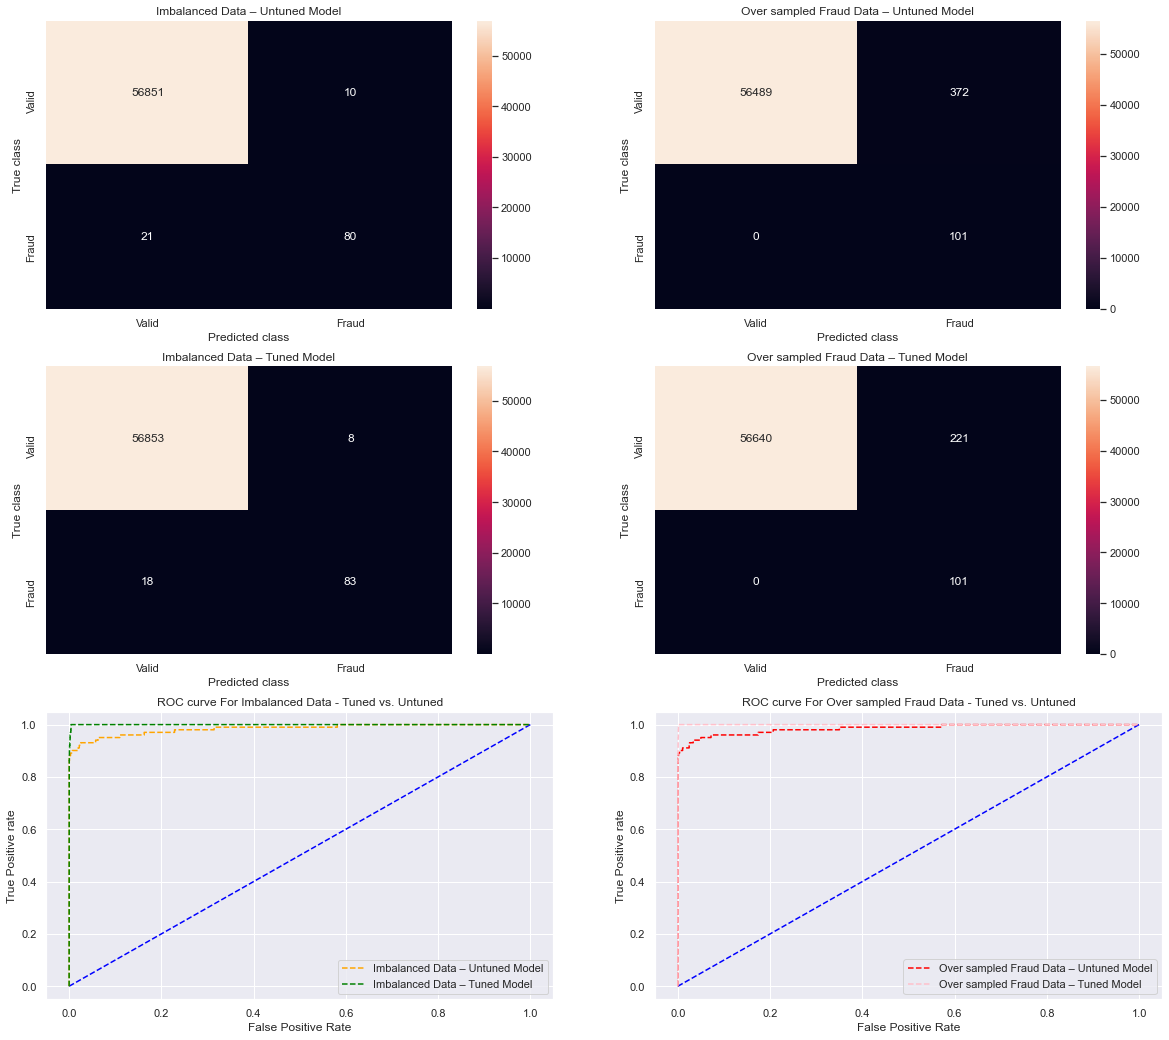

In [44]:
fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,18))
LABELS = ['Valid', 'Fraud']

conf_matrix1 = confusion_matrix(y_test, xgb_yhat)
sns.heatmap(conf_matrix1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax1)
ax1.set_title("Imbalanced Data – Untuned Model")
ax1.set_ylabel("True class")
ax1.set_xlabel("Predicted class")

conf_matrix2 = confusion_matrix(y_test, xgb_os_yhat)
sns.heatmap(conf_matrix2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax2)
ax2.set_title("Over sampled Fraud Data – Untuned Model")
ax2.set_ylabel("True class")
ax2.set_xlabel("Predicted class")

conf_matrix3 = confusion_matrix(y_test, xgb_opt_yhat)
sns.heatmap(conf_matrix3, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax3)
ax3.set_title("Imbalanced Data – Tuned Model")
ax3.set_ylabel("True class")
ax3.set_xlabel("Predicted class")

conf_matrix4 = confusion_matrix(y_test, xgb_opt_os_yhat)
sns.heatmap(conf_matrix4, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax4)
ax4.set_title("Over sampled Fraud Data – Tuned Model")
ax4.set_ylabel("True class")
ax4.set_xlabel("Predicted class")

#plot curve for tpr = fpr
ax5.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax5.plot(fpr, tpr, linestyle='--',color='orange', label='Imbalanced Data – Untuned Model')
ax5.plot(fpr_os, tpr_os, linestyle='--',color='green', label='Imbalanced Data – Tuned Model')
ax5.set_title("ROC curve For Imbalanced Data - Tuned vs. Untuned")
ax5.set_ylabel("True Positive rate")
ax5.set_xlabel("False Positive Rate")
ax5.legend(loc='best')
# plt.savefig('ROC',dpi=300)


#plot curve for tpr = fpr
ax6.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax6.plot(fpr_opt, tpr_opt, linestyle='--',color='red', label='Over sampled Fraud Data – Untuned Model')
ax6.plot(fpr_opt_os, tpr_opt_os, linestyle='--',color='pink', label='Over sampled Fraud Data – Tuned Model')
ax6.set_title("ROC curve For Over sampled Fraud Data - Tuned vs. Untuned")
ax6.set_ylabel("True Positive rate")
ax6.set_xlabel("False Positive Rate")
ax6.legend(loc='best')

In [45]:
# Create dataframe with metrics
df_metrics_opt = pd.DataFrame(columns=['Data Type', 'Accuracy [%]', 'Precision [%]','Recall [%]',
                                       'F1 Score [%]','MCC', 'AUC', 'Compute Time [min]'])



# Add Metrics of Untuned Model on Imbalnaced Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Imbalanced Data - Untuned Model',
                                        'Accuracy [%]' : xgb_acc, 'Precision [%]' : xgb_pre,
                                        'Recall [%]' : xgb_rec,'F1 Score [%]' : xgb_f1,
                                        'MCC' : xgb_mcc, 'AUC' : auc_score, 
                                        'Compute Time [min]' : time_xgb
                                       }, ignore_index = True
                                      )

# Add Metrics of Tuned Model on Imbalnaced Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Imbalanced Data - Tuned Model',
                                        'Accuracy [%]' : xgb_opt_acc, 'Precision [%]' : xgb_opt_pre,
                                        'Recall [%]' : xgb_opt_rec, 'F1 Score [%]' : xgb_opt_f1,
                                        'MCC' : xgb_opt_mcc, 'AUC' : auc_score_opt,
                                        'Compute Time [min]' : time_cv + time_xgb_opt,
                                       }, ignore_index = True
                                      )

# Add Metrics of Untuned Model on Oversampled Valid Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Over sampled Valid - Untuned Model',
                                        'Accuracy [%]' : xgb_os_acc, 'Precision [%]' : xgb_os_pre,
                                        'Recall [%]' : xgb_os_rec, 'F1 Score [%]' : xgb_os_f1,
                                        'MCC' : xgb_os_mcc,'AUC' : auc_score_os, 
                                        'Compute Time [min]' : time_os + time_xgb_os},
                                       ignore_index = True
                                      )

# Add Metrics of Tuned Model on Oversampled Valid Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Over sampled Valid - Tuned Model', 'Accuracy [%]' : xgb_opt_os_acc,
                                        'Precision [%]' : xgb_opt_os_pre, 'Recall [%]' : xgb_opt_os_rec,
                                        'F1 Score [%]' : xgb_opt_os_f1, 'MCC' : xgb_opt_os_mcc, 'AUC' : auc_score_opt_os,
                                        'Compute Time [min]' : time_os+time_cv_os+time_xgb_opt_os}, ignore_index = True)

df_metrics_opt

,Data Type,Accuracy [%],Precision [%],Recall [%],F1 Score [%],MCC,AUC,Compute Time [min]
0,Imbalanced Data - Untuned Model,99.9,88.9,79.2,83.8,0.84,0.98,1.0
1,Imbalanced Data - Tuned Model,100.0,91.2,82.2,86.5,0.87,0.98,49.0
2,Over sampled Valid - Untuned Model,99.3,21.4,100.0,35.2,0.46,1.00,1.0
3,Over sampled Valid - Tuned Model,99.6,31.4,100.0,47.8,0.56,1.00,142.0


<h3>Conclusion after Fine Tuning</h3>
Fine tuning improved performance of algorithm trained on imbalanced data set which we use as our benchmark and significantly improved performance of algorithm trained on over sampled data. This is done by reducing number of false negatives i.e. valid transactions erroneously classified as fraudulent (drop from 372 to 221), which translates to Precision raised from 21.4% to 31.4% while maintaining perfect Recall 100% i.e. all fraudulent transactions has been detected.
<br><br>
So far, the training and fine tuning has been performed on a specific split of data on training and testing sets. How would the model have performed on different splits of the data? To answer that question, we need to use a technique called cross validation. Below we are going to use this technique on our best performer:


<a href='#index'>Back to Index</a>
<a name='cv'></a>
<h2>10. XGBoost - Cross Validation</h2>

In [46]:
start  = time.time()

# # %%time takes it takes roughly 1h 13min to run this cell

xgb_cv_opt = np.array(cross_val_score(xgb_opt, x_train, y_train, cv=10, scoring = 'recall')) 

end  = time.time()
time_xgb_cv_opt = exec_time(start,end)

Execution Time: 00:02:21


In [47]:
xgb_cv_opt.min(), xgb_cv_opt.mean()

(0.5897435897435898, 0.7799358974358974)

In [48]:
start  = time.time()

# # %%time takes it takes roughly 1h 13min to run this cell

xgb_cv_opt_os = np.array(cross_val_score(xgb_opt_os, x_train, y_train, cv=10, scoring = 'recall')) 

end  = time.time()
time_xgb_cv_opt_os = exec_time(start,end)

Execution Time: 00:01:58


In [49]:
xgb_cv_opt_os.min(), xgb_cv_opt_os.mean()

(0.6153846153846154, 0.7799358974358974)

<h3>Conclusion after Cross Validation</h3>
Below there is a table showing Recall rate of model trained on imbalanced data set (baseline) and oversampled dataset. Cross validation shown below, shows that model trained on data set with over sampled fraudulent transactions is expected to perform better than the baseline but only by narrow margin and only in the worst case and best case scenario. On average both models are expected to perform similarly.

|TRAINING SET TYPE| ON TRAINED SET [%] | CV MEAN [%] | CV MIN [%] |
| --- | --- | --- | --- |
| Imbalanced | 82% | 78%  | 59% |
| Oversampled | 100% | 78% | 61% |


<a href='#index'>Back to Index</a>
<a name='glos'></a>
<h2>11. Glossary</h2>

<strong>Simple Accuracy</strong> is one of the most basic evaluation metrics. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions:
<br><br>
$Simple Accuracy = \frac{No. of correct predictions}{Total  no.of predictions} = \frac{True Positive + True Negative}{True Positive + True Negative + False Postivie + False Negative}$ 
<br><br>
The <span style="color:red;font-weight: bold">problem</span> with <strong>Simple Accuracy</strong> appears when data is unbalanced, like in this task where fraudulent transactions is only 0.17%. When the model would indicate that all the transactions are valid and totaly disregard fraudulent transactions, accuracy would be

all_ok_accuracy $ = \frac{TP + TN}{TP + TN + FP + FN} = \frac{0 + 284315}{0 + 284315 + 0 + 492}*100\% = 99.8\% $
<br><br>
This shows almost perfect accuracy, but we have not detected any fraud. I am not sure whether the credit card issuer had this in their mind 😉 
<br><br>
<hr>
<strong>Cross Validation</strong>
Models are assessed based on particular split into training data and test data (see <a href='#split'>train_test_split</a>). The issue might be that "we are lucky" with our split and our models work well in our particular case.<br><br>
<strong>But what if we had a different split?</strong> Fortunately, <strong>Cross Validation</strong> comes to the rescue! <br><br> Cross validation essentially splits the training data into training data and validation data, trains the model and checks it against validation set. 
<br><br>Then the step is repeated multiple times (multiple experiments in figure below) with different split between test data and validation data. <br><br>
After multiple operations of splitting and validation, we get an array of metrics. From the array we will learn what is the worst, what is mean value of the metric. This gives us insight into how our model will perform in production which can be communicated to the decision makers.
<br>
<img src="https://habrastorage.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png" alt="cross validation diagram" class="bg-primary" width="600px" style="display: block; margin-left: auto; margin-right: auto;">
<hr>
<strong>Matthews Correlation Coefficient</strong> The coefficient takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. <br>
The MCC is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1.
<ul>
  <li> +1 represents a perfect prediction</li>
  <li> 0 no better than random prediction</li>
  <li> −1 indicates total disagreement between prediction and observation</li>
</ul>
<br><br>
$$ MCC = \frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP+FP) \cdot (TP+FN) \cdot (TN+FP) \cdot (TN+FN)}}$$
<br><br>
The bottom line is that MCC will only give a high score if both classes are well predicted, while F1 score will indicate good performance on highly unbalanced data, while this might not be the case.
<hr>
<strong>F-score or F1-score</strong> is a measure of a model's accuracy on a dataset. It is used to evaluate binary classificantion systems, which classify examples into <strong>positive</strong> or <strong>negative</strong>. <br>
The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall. <br>
The F-score is acommonly used for evaulating information retrieval systems such as search engines, and also for many kinds of machine learning models, in particular in natural language processing.
$$ F1 = \frac{2}{\frac{1}{Recall} \cdot \frac{1}{Precsion}}$$
<a href="https://deepai.org/machine-learning-glossary-and-terms/f-score#:~:text=The%20F%2Dscore%2C%20also%20called,model's%20accuracy%20on%20a%20dataset.&text=The%20F%2Dscore%20is%20a,the%20model's%20precision%20and%20recall.">Source of info</a>
<hr>
<strong>PRECISION</strong> tries answer the question: Out of the all the emails, sent to the spam inbox, how many were actually spam?

$$ Precision = \frac{True Positive}{True Positive + False Positive} = \frac{Spam In Spam Folder}{Spam In Spam Folder + Not Spam In Spam Folder}$$

We <span style="color:green;font-weight: bold">CARE</span> about <strong>High Precision</strong> when we want to make sure that whatever we classify as positive, is definitely a positive and not a false positive. 
<br><br>
Good example is a spam detector:
<br>
We want to make sure that whatever is classified as SPAM (TRUE) is definitely as SPAM (TRUE POSITIVE). Because the risk of sending an important email to SPAM (FALSE POSITIVE) significantly out weights the hassle of getting some SPAM emails through our filter from time to time (FALSE NEGATIVE).
<hr>
<strong>RECALL</strong>  tres to answer the question: Out of the sick patients, how many did we correctly diagnose as sick?
<br><br>
$$ Recall = \frac{True Positive}{True Positive + False Negative} = \frac{Sick Patient DiagnosedAsSick}{Sick Patient
DiagnosedAsSick + Sick Patient DiagnosedAsHealthy}$$
<br>
We <span style="color:green;font-weight: bold">CARE</span> about <strong>High Recall</strong> when we want to make sure that we find as much postives as possible. 
<br><br>
Good example is a medical diagnostics:
<br>
We want to make sure that we find as much sick people (TRUE POSITIVE) as possible and we won't send back home without treatment anybody who is sick (FALSE NEGATIVE). So in this case we don't care too much if we diagnose as a sick person somebody who is healthy (FALSE POSTIVE) because it will cost us some extra checks. Whrease sending somebody who is sick without treament might be deadly for that person.
<hr>